## AML Assignment 2

### Loading the IMDB data 




In [35]:

!pip install keras_preprocessing
from keras.datasets import imdb
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

max_features = 10000 # nr of words to consider as features
maxlen = 150 # cuts off the text after this nr of words among the most common words, i.e. 'max_features'
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

x_train = x_train[:200]
y_train = y_train[:200]


x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen) 

### Using an Embedding layer and classifier on the IMDB data.



In [36]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 

model.add(Flatten()) # Flattens the 3D tensor of embeddings (=(samples, maxlen, 8)) into a 2D tensor of shape (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) # Adds the classifier sigmoid on top (https://en.wikipedia.org/wiki/Sigmoid_function)
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 150, 8)            80000     
                                                                 
 flatten_5 (Flatten)         (None, 1200)              0         
                                                                 
 dense_9 (Dense)             (None, 1)                 1201      
                                                                 
Total params: 81,201
Trainable params: 81,201
Non-trainable params: 0
_________________________________________________________________


### Number of Parameters

**Embedding** = vocabulary size i.e. input x output = 10.000 x 8 = 80.000

**Dense** = maxlen i.e. input_length x Output + 1 = 300 x 8 + 1 =2.401

*** Total params = 82.401***

In [37]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 0s 36ms/step - loss: 0.6944 - acc: 0.5188 - val_loss: 0.6899 - val_acc: 0.5750
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 0.6729 - acc: 0.8000 - val_loss: 0.6889 - val_acc: 0.6250
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6564 - acc: 0.9000 - val_loss: 0.6880 - val_acc: 0.5750
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6402 - acc: 0.9312 - val_loss: 0.6870 - val_acc: 0.5750
Epoch 5/10
5/5 [==============================] - 0s 8ms/step - loss: 0.6238 - acc: 0.9375 - val_loss: 0.6861 - val_acc: 0.6000
Epoch 6/10
5/5 [==============================] - 0s 9ms/step - loss: 0.6066 - acc: 0.9625 - val_loss: 0.6852 - val_acc: 0.5750
Epoch 7/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5889 - acc: 0.9625 - val_loss: 0.6842 - val_acc: 0.5750
Epoch 8/10
5/5 [==============================] - 0s 8ms/step - loss: 0.5702 - acc: 0.9563 - val_loss

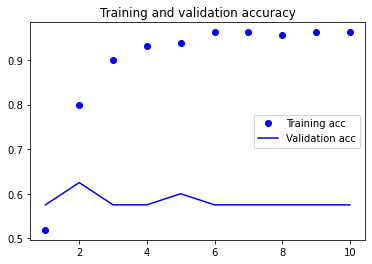

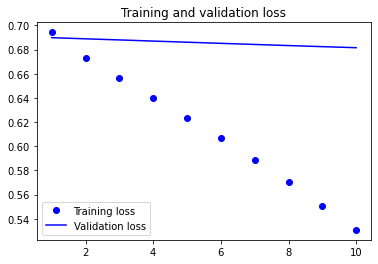

In [38]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Using Pretrained Word Embeddings


In [39]:
import os

imdb_dir = "./"
train_dir = os.path.join(imdb_dir, "test")


labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            #f = open(os.path.join(dir_name, fname))
            # using code above gave: UnicodeDecodeError: 'charmap' codec can't decode byte 0x8d in position 194: character maps to <undefined>
            # added: encoding='utf-8'
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)                    
                

#### Tokenizing the data


In [40]:
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing. sequence import pad_sequences
import numpy as np
from keras import preprocessing

from keras_preprocessing.sequence import pad_sequences

maxlen = 150 # cuts off review after 100 words
training_samples = 200 # Trains on 200 samples
validation_samples = 10000 # Validates o 10000 samples
max_words = 10000 # Considers only the top 10000 words in the dataset

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

indices = np.arange(data.shape[0]) # Splits data into training and validation set, but shuffles is, since samples are ordered: 
# all negatives first, then all positive
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)


Found 72633 unique tokens.
Shape of data tensor: (17243, 150)
Shape of label tensor: (17243,)


### Using the GloVe word embedding


In [41]:
glove_dir = ".\glove_6B_data"

embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding='utf-8') #added , encoding='utf-8'
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.



#### Preparing the GloVe word embeddings matrix

In [42]:
embedding_dim = 100 # GloVe contains 100-dimensional embedding vectors for 400.000 words

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Words not found in the mebedding index will all be zeros

#### Model Definition

In [43]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 150, 100)          1000000   
                                                                 
 flatten_6 (Flatten)         (None, 15000)             0         
                                                                 
 dense_10 (Dense)            (None, 32)                480032    
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,480,065
Trainable params: 1,480,065
Non-trainable params: 0
_________________________________________________________________



#### Loading pretrained word embedding into the Embeddig layer


In [44]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False 


#### Training and Evaluating the Model

In [45]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")        

Epoch 1/10
7/7 [==============================] - 1s 128ms/step - loss: 1.3668 - acc: 0.5650 - val_loss: 0.5982 - val_acc: 0.7195
Epoch 2/10
7/7 [==============================] - 1s 119ms/step - loss: 0.4479 - acc: 0.7550 - val_loss: 0.6025 - val_acc: 0.7195
Epoch 3/10
7/7 [==============================] - 1s 107ms/step - loss: 0.3569 - acc: 0.7600 - val_loss: 0.8366 - val_acc: 0.7195
Epoch 4/10
7/7 [==============================] - 1s 142ms/step - loss: 0.3169 - acc: 0.7950 - val_loss: 0.7371 - val_acc: 0.7195
Epoch 5/10
7/7 [==============================] - 1s 122ms/step - loss: 0.2747 - acc: 0.8550 - val_loss: 0.8191 - val_acc: 0.7195
Epoch 6/10
7/7 [==============================] - 1s 141ms/step - loss: 0.2179 - acc: 0.8650 - val_loss: 0.9828 - val_acc: 0.7195
Epoch 7/10
7/7 [==============================] - 1s 111ms/step - loss: 0.2189 - acc: 0.8800 - val_loss: 0.8942 - val_acc: 0.7195
Epoch 8/10
7/7 [==============================] - 1s 132ms/step - loss: 0.1925 - acc: 0.90

#### Plotting the Results

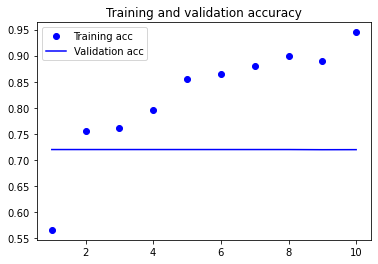

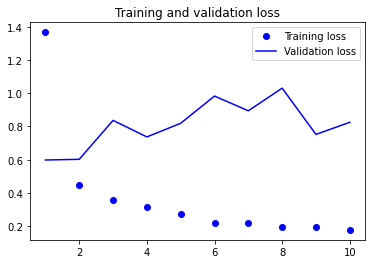

In [46]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### A concrete LSTM example
#### Preparing the IMDB data

In [47]:
from keras.datasets import imdb
# from keras.preprocessing import sequence
from keras_preprocessing.sequence import pad_sequences


max_features = 10000 # nr of words to consider as features CUTTING THIS DOWN TO 1000 FROM 10.000!!!
maxlen = 150 # cuts off the text after this nr of words among the most common words, i.e. 'max_features' CUT FROM 500 TO 100 !!!
batch_size = 32

print ("loading data ...")
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words = max_features)

input_train = input_train[:5000]
y_train = y_train[:5000]
input_test = input_test[:5000]
y_test = y_test[:5000]

print(len(input_train), "train sequences")
print(len(input_test), "test sequences")


print("Pad sequences (samples x time)")
input_train = pad_sequences(input_train, maxlen=maxlen)
print("input_train shape:", input_train.shape)
print("input_test shape:", input_test.shape)

loading data ...
5000 train sequences
5000 test sequences
Pad sequences (samples x time)
input_train shape: (5000, 150)
input_test shape: (5000,)


In [48]:
from keras.models import Sequential
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation = "sigmoid"))

model.compile(optimizer = "rmsprop",
             loss = "binary_crossentropy",
             metrics = ["acc"])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
32/32 [==============================] - 3s 56ms/step - loss: 0.6917 - acc: 0.5275 - val_loss: 0.6892 - val_acc: 0.5820
Epoch 2/10
32/32 [==============================] - 1s 46ms/step - loss: 0.6762 - acc: 0.6192 - val_loss: 0.6420 - val_acc: 0.6300
Epoch 3/10
32/32 [==============================] - 2s 47ms/step - loss: 0.5642 - acc: 0.7178 - val_loss: 0.5541 - val_acc: 0.7410
Epoch 4/10
32/32 [==============================] - 2s 47ms/step - loss: 0.4448 - acc: 0.8188 - val_loss: 0.5467 - val_acc: 0.7450
Epoch 5/10
32/32 [==============================] - 2s 48ms/step - loss: 0.3529 - acc: 0.8710 - val_loss: 0.4218 - val_acc: 0.8120
Epoch 6/10
32/32 [==============================] - 2s 47ms/step - loss: 0.2865 - acc: 0.8930 - val_loss: 0.4562 - val_acc: 0.7930
Epoch 7/10
32/32 [==============================] - 2s 47ms/step - loss: 0.2219 - acc: 0.9300 - val_loss: 0.4113 - val_acc: 0.8240
Epoch 8/10
32/32 [==============================] - 2s 48ms/step - loss: 0.1856 - a

Despite the drastically smaller datasets the LSTM model performs surprisingly well!

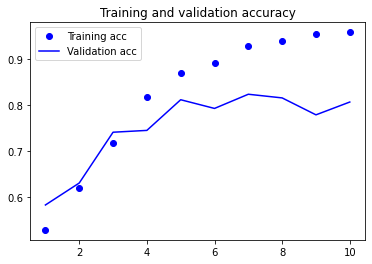

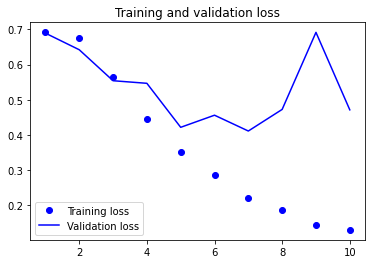

In [49]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Summary of graphs 
- not fully comparable with each other due to various inputs/amounts of data in the three models

![alt text](SummaryOfGraphs.jpg "")